# scvelo analysis script

In [64]:
from analysis_SIM_compare_fun_notebook import *
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt

###############################################
########## cosin similarity analysis ##########
###############################################
# path: server
analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'
detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/'
raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/'
scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/'
foldername_para=''

########## scv
# path: server
print('running scv analysis')

# for ratio in [0.4,0.6,0.8,1]:
for ratio in [0.2]:
    print(ratio)
    scVelo = get_similarity_scVelo(ratio,scv_result_input_path,raw_input_path,type='multi',path='Path2Down')
    scVelo.to_csv(analysis_result_path+'scvelo_similarity_eachCell'+str(ratio)+'.csv',index=False)
    sns.boxplot(x="ratio", y="similarity", hue='method', data=scVelo)

# celldancer analysis script

In [ ]:
from analysis_SIM_compare_fun_notebook import *
import sys
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt

###############################################
########## cosin similarity analysis ##########
###############################################
# path: server
analysis_result_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'
detail_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/celldancer/'
raw_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/raw/'
scv_result_input_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/velocity_result/scv/'
foldername_para=''

########## celldancer
print('running celldancer analysis')

# for ratio in [0.2,0.4,0.6,0.8,1]:
# for ratio in [0.2]:
for ratio in [0.2,0.4,0.6,0.8,1]:

    print(ratio)
    cellDancer = get_similarity_cellDancer(ratio,detail_input_path,raw_input_path,type='multi',foldername_para=foldername_para,path='Path2Down')
    cellDancer.to_csv(analysis_result_path+'celldancer_similarity_eachCell'+str(ratio)+'.csv',index=False)
    sns.boxplot(x="ratio", y="similarity", hue='method', data=cellDancer)

# combine scv and celldancer error rate and plot 

1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv
1
celldancer
scv
0.8
celldancer
scv
0.6
celldancer
scv
0.4
celldancer
scv


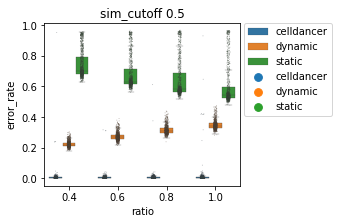

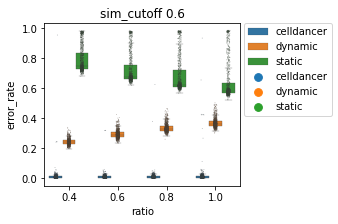

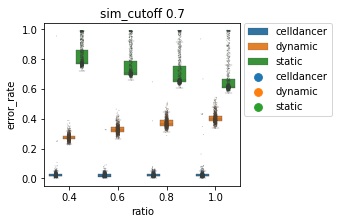

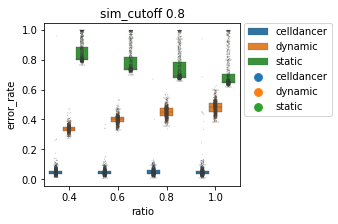

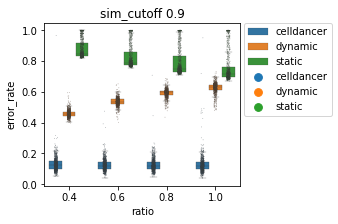

In [103]:
###################################################
########## scv and celldancer error rate ##########
###################################################

# ratio_list=[1]
ratio_list=[1,0.8,0.6,0.4]


sim_cutoff_list=[0.5,0.6,0.7,0.8,0.9]
# sim_cutoff_list=[0.7]

for sim_cutoff in sim_cutoff_list:
    celldancer_error_df_all=pd.DataFrame()
    scv_error_df_all=pd.DataFrame()
    combined_error_df=pd.DataFrame()
    for ratio in ratio_list:
        print(ratio)

        #celldancer
        print('celldancer')
        celldancer_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/celldancer_similarity_eachCell'+str(ratio)+'.csv')
        celldancer_cell.loc[celldancer_cell.similarity<=sim_cutoff,'cutoff_count']=1
        celldancer_cell.loc[celldancer_cell.similarity>sim_cutoff,'cutoff_count']=0

        error_calc_celldancer=celldancer_cell[['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_celldancer['error_rate']=error_calc_celldancer.cutoff_count/len(set(celldancer_cell.cellID))
        error_calc_celldancer['method']='celldancer'
        error_calc_celldancer['ratio']=ratio

        celldancer_error_df_all=celldancer_error_df_all.append(error_calc_celldancer)

        #scv
        print('scv')
        scv_cell=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/scvelo_similarity_eachCell'+str(ratio)+'.csv')
        scv_cell.loc[scv_cell.similarity<=sim_cutoff,'cutoff_count']=1
        scv_cell.loc[scv_cell.similarity>sim_cutoff,'cutoff_count']=0

        error_calc_dynamic=scv_cell[scv_cell['method']=='dynamic'][['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_dynamic['error_rate']=error_calc_dynamic.cutoff_count/len(set(scv_cell.cellID))
        error_calc_dynamic['method']='dynamic'
        error_calc_dynamic['ratio']=ratio

        error_calc_static=scv_cell[scv_cell['method']=='static'][['gene','cutoff_count']].groupby('gene').sum().reset_index()
        error_calc_static['error_rate']=error_calc_static.cutoff_count/len(set(scv_cell.cellID))
        error_calc_static['method']='static'
        error_calc_static['ratio']=ratio

        scv_error_df=pd.concat([error_calc_dynamic,error_calc_static])
        scv_error_df_all=scv_error_df_all.append(scv_error_df)
        
        # combine celldancer and scv
    combined_error_df=pd.concat([celldancer_error_df_all,scv_error_df_all])
    combined_error_df.to_csv(('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'+'error_sim'+str(sim_cutoff)+'.csv'),index=False)
    # plt.figure()
    # plt.title('sim_cutoff '+str(sim_cutoff))
    # sns.color_palette("flare", as_cmap=True)

    # sns.boxplot(x="ratio", y="error_rate", hue='method', data=combined_error_df)
    plot_box_error(combined_error_df,sim_cutoff)
    plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path_new/analysis_result/'+'error_sim'+str(sim_cutoff)+'.pdf')


###################################################
#######End scv and celldancer error rate ##########
###################################################